In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, rmag_BKG1, gmag_BKG1, zmag_BKG1, color_BKG1, rmag_LRG1, gmag_LRG1, zmag_LRG1, color_LRG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)
id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, rmag_BKG2, gmag_BKG2, zmag_BKG2, color_BKG2, rmag_LRG2, gmag_LRG2, zmag_LRG2, color_LRG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)

ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])
dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG = np.concatenate([z_LRG1, z_LRG2])
gmag_LRG = np.concatenate([gmag_LRG1, gmag_LRG2])
gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_LRG = np.concatenate([rmag_LRG1, rmag_LRG2])
rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_LRG = np.concatenate([zmag_LRG1, zmag_LRG2])
zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
color_LRG = np.concatenate([color_LRG1, color_LRG2])
color_BKG = np.concatenate([color_BKG1, color_BKG2])

print("end readdata")

length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  5182673
length of id_ALL:  5182673
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 5182673
length of idcut = 1 (is an LRG in DECaLS-only file): 1233
length of idcut = 0 (is not an LRG in DECaLS-only file): 5181440
length of z_lrg: 1233
length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  4008392
length of id_ALL:  4008392
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 4008392
length of idcut = 1 (is an LRG in DECaLS-only file): 391
length of idcut = 0 (is not an LRG in DECaLS-only file): 4008001
length of z_lrg: 391
end readdata


In [3]:
ra_LRG = ra_LRG[np.where(zmag_LRG <= 21.5)]
dec_LRG = dec_LRG[np.where(zmag_LRG <= 21.5)]

ra_BKG = ra_BKG[np.where(zmag_BKG <= 21.5)]
dec_BKG = dec_BKG[np.where(zmag_BKG <= 21.5)]

gmag_LRG = gmag_LRG[np.where(zmag_LRG <= 21.5)]
rmag_LRG = rmag_LRG[np.where(zmag_LRG <= 21.5)]
zmag_LRG = zmag_LRG[np.where(zmag_LRG <= 21.5)]
color_LRG = color_LRG[np.where(zmag_LRG <= 21.5)]

gmag_BKG = gmag_BKG[np.where(zmag_BKG <= 21.5)]
rmag_BKG = rmag_BKG[np.where(zmag_BKG <= 21.5)]
zmag_BKG = zmag_BKG[np.where(zmag_BKG <= 21.5)]
color_BKG = color_BKG[np.where(zmag_BKG <= 21.5)]

In [4]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [5]:
row = 10
column = 10
rmag = np.concatenate([rmag_LRG, rmag_BKG])
color = np.concatenate([color_LRG, color_BKG])
# creates histogram for survey sources; excludes LRGs
H, xedges, yedges = np.histogram2d(rmag, color, normed=False)
# print("xedges: ", xedges)
# print("yedges: ", yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(25.) # * (3600.**2.)) # converts square degrees to square arcseconds

distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)

print('end nearNeighbor')

end nearNeighbor


In [6]:
distance_r2 = 0.4 # in degree
distance_r3 = 0.5 # in degree

numbkg, med_local, sigma, omega, Nbkg = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)

print("end bkg")

len index_r3: 1624
shape local_bkg:  (1624, 10, 10)
type local_bkg:  <class 'numpy.ndarray'>
0
0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.07355303e+00 5.65884242e+01 3.53677651e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+01 2.65258238e+02 3.53677651e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  1.69765273e+02 1.36165896e+03 2.47574356e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.06729299e+02 3.90813805e+03 9.90297

0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.01252007e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.36619772e+01 5.44663583e+02 1.41471061e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  3.00626004e+02 3.58629138e+03 9.54929659e+01 3.53677651e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.07355303e+00
  8.02848268e+02 7.48028233e+03 1.94522708e+02 1.06103295e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000

430
0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 3.53677651e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.07355303e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 7.07355303e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  6.01252007e+01 4.38560288e+02 1.41471061e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.06103295e+01
  3.46604098e+02 3.20078274e+03 8.48826363e+01 3.53677651e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41471061e+01
  8.06385045e+02 6.65975017e+03 2.05133038e+02 2.12206591e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0

0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  0.00000000e+00 5.65884242e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.89045416e+01 3.53677651e+02 3.53677651e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.61721462e+02 2.24585309e+03 4.95148712e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.06103295e+01
  6.18935890e+02 5.87104901e+03 1.55618167e+02 1.41471061e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000

1095
0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53677651e+00 5.65884242e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.47574356e+01 3.04162780e+02 3.53677651e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  2.12206591e+02 1.72948371e+03 3.18309886e+01 3.53677651e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41471061e+01
  4.84538382e+02 4.09205043e+03 9.19561893e+01 1.06103295e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

1430
0.2827433388230813
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.53677651e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.06103295e+01 7.42723068e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.24413182e+01 3.81971863e+02 1.06103295e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53677651e+00
  2.33427250e+02 2.45098612e+03 7.07355303e+01 3.53677651e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.06103295e+01
  6.47230102e+02 6.19643245e+03 1.83912379e+02 3.53677651e+00
  3.53677651e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

In [ ]:
print(sigma.shape)

In [7]:
Nsat = np.array(near) - np.array(Nbkg)

# print(Nsat)

print("end Nsat")

end Nsat


mean number of satellites is 6.953048323202712
median number of satellites is 5.095113381984934
standard deviation of satellites is 11.206818230281096
standard error is 0.2781781842366298


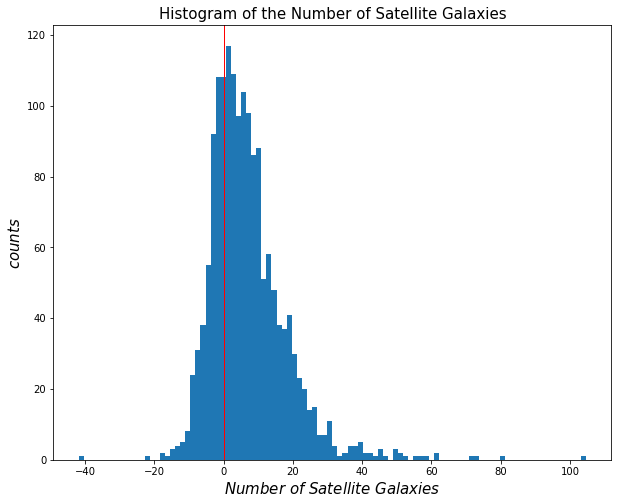

In [9]:
totalNsat(Nsat)

# plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/totalNsat.pdf")
# plt.savefig("/Users/mindy/Research/Plots/LRG_Project_Plots/totalNsat.pdf")
plt.savefig('/Users/mtownsend/Desktop/totalNsat.pdf')

plt.show()

In [ ]:
distance_r2 = 0.4
distance_r3 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

sum_sat = []
median_sat = []
Nsat = []
for i in range(len(distance_r3)):
    numbkg, med_local, sigma, omega, Nbkg, r2, dist_r2, r3, dist_r3 = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3[i], kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)
    Nsat = np.array(near) - np.array(Nbkg)
    mediansat = totalNsat(Nsat)
#     sum_sat.append(np.sum(N_sat))
    median_sat.append(mediansat)


In [ ]:
print(median_sat)

plt.plot(distance_r3, median_sat)
plt.show()